# Image Classification with CIFAR-10 Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# The Data
CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
    * airplane : 0
    * automobile : 1
    * bird : 2
    * cat : 3
    * deer : 4
    * dog : 5
    * frog : 6
    * horse : 7
    * ship : 8
    * truck : 9
Visit : https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


(32, 32, 3)


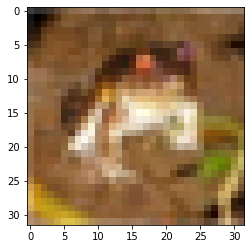

In [4]:
# FROG
plt.imshow(x_train[0])
print(x_train[0].shape)

(32, 32, 3)


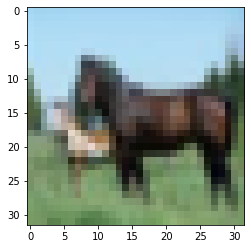

In [5]:
# HORSE
plt.imshow(x_train[12])
print(x_train[12].shape)

# PreProcessing/ Scaling data

In [6]:
print(x_train[0].max())
print(x_train[0].min())

255
0


In [7]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
print(x_train[0].max())
print(x_train[0].min())

1.0
0.0


# Labels data

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
print('Shape of y_train: ',y_train.shape)
print('Category: ',y_train[0])

Shape of y_train:  (50000, 1)
Category:  [6]


In [12]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test,10)

In [13]:
print(y_cat_train.shape)
print(y_cat_test.shape)

(50000, 10)
(10000, 10)


In [14]:
print(y_cat_train[0])
print('Category: ',y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Category:  [6]


# Building the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [20]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 367s 7ms/sample - loss: 1.5144 - accuracy: 0.4566 - val_loss: 1.3437 - val_accuracy: 0.5234
Epoch 2/15
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.1504 - accuracy: 0.5979 - val_loss: 1.2147 - val_accuracy: 0.5668
Epoch 3/15
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.9946 - accuracy: 0.6554 - val_loss: 1.0571 - val_accuracy: 0.6338
Epoch 4/15
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.8882 - accuracy: 0.6931 - val_loss: 1.0932 - val_accuracy: 0.6520
Epoch 5/15
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.8001 - accuracy: 0.7257 - val_loss: 1.0415 - val_accuracy: 0.6658
Epoch 6/15
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.7335 - accuracy: 0.7494 - val_loss: 1.0102 - val_accuracy: 0.6645
Epoch 7/15
50000/50000 [==============================]

# Model Evaluation

In [22]:
model_loss = pd.DataFrame(model.history.history)

In [23]:
model_loss

,loss,accuracy,val_loss,val_accuracy
0,1.514421,0.45660,1.343729,0.5234
1,1.150410,0.59788,1.214708,0.5668
2,0.994645,0.65544,1.057075,0.6338
3,0.888192,0.69314,1.093154,0.6520
4,0.800126,0.72570,1.041521,0.6658
5,0.733525,0.74940,1.010219,0.6645
6,0.677804,0.76986,1.020005,0.6975
7,0.627783,0.78796,1.010287,0.6858
8,0.583941,0.80282,1.041033,0.6896


In [24]:
model_loss.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

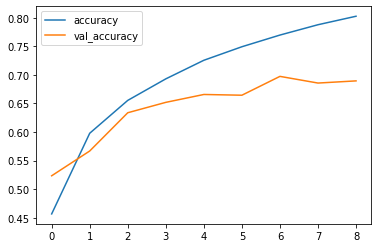

In [28]:
model_loss[['accuracy','val_accuracy']].plot()

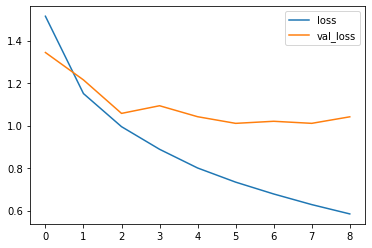

In [29]:
model_loss[['loss','val_loss']].plot()

In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.041033162689209, 0.6896]


In [32]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(x_test)

In [33]:
confusion_matrix(y_test,predictions)

array([[706,  33,  48,  40,  20,  11,   7,   6,  87,  42],
       [ 35, 828,   8,  12,   2,   3,   2,   4,  31,  75],
       [ 65,  17, 543, 152,  66,  64,  29,  31,  19,  14],
       [ 16,  19,  51, 651,  43, 112,  25,  29,  31,  23],
       [ 26,   9,  57, 134, 613,  49,  17,  69,  15,  11],
       [ 12,  11,  38, 303,  26, 527,  11,  47,  13,  12],
       [  7,  11,  50, 148,  33,  29, 687,   5,  13,  17],
       [ 19,  11,  19,  83,  52,  49,   2, 728,   4,  33],
       [ 64,  33,   5,  13,   6,   7,   2,   6, 822,  42],
       [ 33, 106,  12,  17,   1,   5,   1,   9,  25, 791]], dtype=int64)

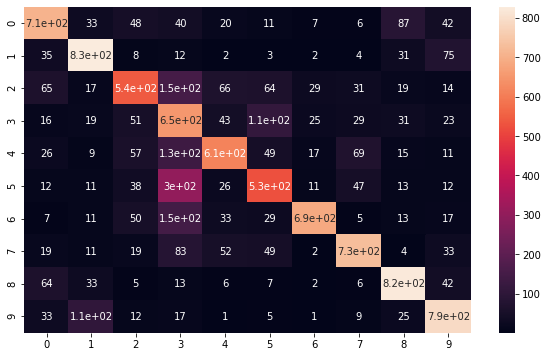

In [34]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [35]:
my_image = x_test[16]

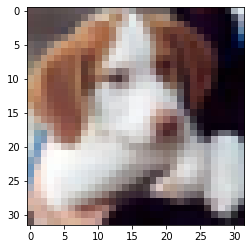

In [36]:
plt.imshow(my_image)

In [37]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)

In [38]:
# 5 is DOG